In [128]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from scipy.fft import fft,fftfreq
import scipy


In [129]:
hbar = 1 *1e-34

def print_section():
    print("---------------------------------------------------------------------------------------------------------------------")
    return None
random.seed(42069) #Seed for reproducibility
T = 10 * 1e-3
kb = 1.38*1e-23
kappa = 0.248;
z0 = 3/4*2.7*1e-3;
r0 = 3/4*3.5*1e-3;
a1 = -0.003;
q1 = 0.25;#0.21801801801801804
omega_RF = 2*np.pi*5.2*1e6;
m1 = 135*1.66*(10**(-27))
m2 = 9000*1.66*(10**(-27))
Q1 = 1*1.6*1e-19;
Q2 = 24*1.6*1e-19;
omega_z1 = omega_RF*np.sqrt(-a1/2)
omega_r1 = omega_RF/2*np.sqrt(q1**2/2+a1)
V_DC = -a1*m1*(3/4*2.7*1e-3)**2*omega_RF**2/(4*Q1*0.248)
V_RF = q1/(2*Q1)*(m1*r0**2*omega_RF**2)
c = 3*1e8
lambd = c/(607.426262*1e12)
alpha = 0.1 #0.5 for radial degeneracy
waist = 500*1e-6
epsilon0 = 8.85*1e-12

amu = 1.66*(10**(-27))

Gamma = 2*np.pi*15.2*1e6
detuning = -Gamma/2
k = 2*np.pi/lambd*np.array([1/2,1/2,1/np.sqrt(2)])
saturation = 0.1


rho = Q2/Q1
mu = m2/m1

a2 = rho/mu * a1
q2 = rho/mu * q1

omega_z2 = omega_RF*np.sqrt(-a2/2)

omega_pond_1 = Q1*V_RF/(np.sqrt(2)*omega_RF*m1*r0**2)
omega_x1 = np.sqrt(omega_pond_1**2 - alpha*omega_z1**2)
omega_y1 = np.sqrt(omega_pond_1**2-(1-alpha)*omega_z1**2)

omega_pond2 = Q2*V_RF/(np.sqrt(2)*omega_RF*m2*r0**2)
omega_x2 = np.sqrt(omega_pond2**2-alpha*omega_z2**2)
omega_y2 = np.sqrt(omega_pond2**2-(1-alpha)*omega_z2**2)

zeq1 = np.cbrt(Q1*Q2/(4*np.pi*epsilon0*m1*omega_z1**2)*(1/(1+1/rho)**2))
zeq2 = -1/rho * zeq1
V_tickle = 0.5*V_DC
print_section()
print("DC Voltage: ",V_DC)
print("RF Voltage: ", V_RF )
print("Tickle Voltage: ", V_tickle)
print_section()
print("Equilibrium positions (µm): " , "z1 = ", zeq1 * 1e6, "    z2 = " ,zeq2 * 1e6)

---------------------------------------------------------------------------------------------------------------------
DC Voltage:  18.541631071307624
RF Voltage:  1287.825221642262
Tickle Voltage:  9.270815535653812
---------------------------------------------------------------------------------------------------------------------
Equilibrium positions (µm):  z1 =  24.209194127006853     z2 =  -1.0087164219586189


In [130]:
deltaZ = zeq1-zeq2
K11 = omega_z1**2 + Q1*Q2/(4*np.pi*epsilon0*m1) * (2/deltaZ**3)
K12 = -Q1*Q2/(4*np.pi*epsilon0*np.sqrt(m1*m2)) * (2/deltaZ**3)
K22 = omega_z2**2 + Q1*Q2/(4*np.pi*epsilon0*m2) * (2/deltaZ**3)

K33 = omega_x1**2 - Q1*Q2/(4*np.pi*epsilon0*m1) * (1/deltaZ**3)
K34 = -0.5*K12
K44 = omega_x2**2 - Q1*Q2/(4*np.pi*epsilon0*m2) * (1/deltaZ**3)

K55 = omega_y1**2 - Q1*Q2/(4*np.pi*epsilon0*m1) * (1/deltaZ**3)
K56 = K34
K66 = omega_y2**2 - Q1*Q2/(4*np.pi*epsilon0*m2) * (1/deltaZ**3)

KZ = np.array([[K11,K12],[K12,K22]])
KY = np.array([[K33,K34],[K34,K44]])
KX = np.array([[K55,K56],[K56,K66]])


z_freqs, z_vecs = LA.eig(KZ)
y_freqs, y_vecs = LA.eig(KY)
x_freqs, x_vecs = LA.eig(KX)

z_freqs = np.sqrt(z_freqs)
y_freqs = np.sqrt(y_freqs)
x_freqs = np.sqrt(x_freqs)



print_section()
print("z frequencies are (kHz) : ", (z_freqs[0])/(2*np.pi*1e3),"     ", (z_freqs[1])/(2*np.pi*1e3))
print("z eigenvectors are: ", z_vecs[:,0], "        ", z_vecs[:,1])
print_section()
print("x frequencies are (kHz) : ", (x_freqs[0])/(2*np.pi*1e3),"     ", (x_freqs[1])/(1*np.pi*1e3))
print("x eigenvectors are: ", x_vecs[:,0], "        ", x_vecs[:,1])
print_section()
print("y frequencies are (kHz) : ", (y_freqs[0])/(2*np.pi*1e3),"     ", (y_freqs[1])/(1*np.pi*1e3))
print("y eigenvectors are: ", y_vecs[:,0], "        ", y_vecs[:,1])
print_section()
if np.sign(z_vecs[0,0]) == np.sign(z_vecs[1,0]):
    z_in_mode = z_vecs[:,0]
    freqZin = z_freqs[0]
    z_out_mode = z_vecs[:,1]
    freqZout = z_freqs[1]
else:
    z_in_mode = z_vecs[:,1]
    freqZin = z_freqs[1]
    freqZout = z_freqs[0]
    z_out_mode = z_vecs[:,0]

if np.sign(x_vecs[0,0]) == np.sign(x_vecs[1,0]):
    x_in_mode = x_vecs[:,0]
    x_out_mode = x_vecs[:,1]
else:
    x_in_mode = x_vecs[:,1]
    x_out_mode = x_vecs[:,0]

if np.sign(y_vecs[0,0]) == np.sign(y_vecs[1,0]):
    y_in_mode = y_vecs[:,0]
    y_out_mode = y_vecs[:,1]
else:
    y_in_mode = y_vecs[:,1]
    y_out_mode = y_vecs[:,0]


#Remember to include z-tickle in radial direction as well.

---------------------------------------------------------------------------------------------------------------------
z frequencies are (kHz) :  345.41821923564       122.02943013912417
z eigenvectors are:  [ 0.99578443 -0.09172445]          [0.09172445 0.99578443]
---------------------------------------------------------------------------------------------------------------------
x frequencies are (kHz) :  368.77403577794854       232.09141764437751
x eigenvectors are:  [0.99924115 0.03895025]          [-0.03895025  0.99924115]
---------------------------------------------------------------------------------------------------------------------
y frequencies are (kHz) :  410.3843864645445       317.33157010369627
y eigenvectors are:  [0.99944503 0.03331118]          [-0.03331118  0.99944503]
---------------------------------------------------------------------------------------------------------------------


Above is all just the settings for the run. We now write some Verlet integration for the 2-ion problem

In [131]:
x1_init = 1e-5*x_in_mode[0]/np.sqrt(m1/amu)+1e-5*x_out_mode[0]/np.sqrt(m1/amu)
x2_init = 1e-5*x_in_mode[1]/np.sqrt(m2/amu)+1e-5*x_out_mode[1]/np.sqrt(m2/amu)


y1_init = 1e-5*y_in_mode[0]/np.sqrt(m1/amu)+1e-5*y_out_mode[0]/np.sqrt(m1/amu)
y2_init = 1e-5*y_in_mode[1]/np.sqrt(m2/amu)+1e-5*y_out_mode[1]/np.sqrt(m2/amu)

z1_init = zeq1+1e-5*z_in_mode[0]/np.sqrt(m1/amu)+1e-5*z_out_mode[0]/(np.sqrt(m1/amu))
z2_init = zeq2+1e-5*z_in_mode[1]/np.sqrt(m2/amu)+1e-5*z_out_mode[1]/(np.sqrt(m2/amu))

r1_init = np.array([x1_init,y1_init,z1_init])
r2_init = np.array([x2_init,y2_init,z2_init])

v1_init = np.zeros(3)
v2_init = np.zeros(3)

t_init = 0
t_end = 1*1e-4

dt = 2*np.pi/(omega_RF)/300

t = 0
ts = []
positions = []
velocities = []
print("Initial Time: ", t_init)
print("End Time: ", t_end)
print("Time Step: ", dt)
print("Total number of steps: ",int(np.floor(t_end/dt)))
print_section()
print("Initial position 1 (µm): ", r1_init*1e6)
print("Initial velcoity 1 (m/s): ", v1_init)

print("Initial position 2 (µm): ", r2_init*1e6)
print("Initial velcoity 2 (m/s): ", v2_init)

print_section()
print("Secular z-direction Barium Frequency (kHz):  ", omega_z1/(2*np.pi*1e3))
print("Secular x-direction Barium Frequency (kHz):  ", omega_y1/(2*np.pi*1e3))
print("Secular y-direction Barium Frequency (kHz):  ", omega_x1/(2*np.pi*1e3))
print_section()
print_section()
print("z frequencies are (kHz) : ", (z_freqs[0])/(2*np.pi*1e3),"     ", (z_freqs[1])/(2*np.pi*1e3))
print("z eigenvectors are: ", z_vecs[:,0], "        ", z_vecs[:,1])
print_section()
print("x frequencies are (kHz) : ", (x_freqs[0])/(2*np.pi*1e3),"     ", (x_freqs[1])/(1*np.pi*1e3))
print("x eigenvectors are: ", x_vecs[:,0], "        ", x_vecs[:,1])
print_section()
print("y frequencies are (kHz) : ", (y_freqs[0])/(2*np.pi*1e3),"     ", (y_freqs[1])/(1*np.pi*1e3))
print("y eigenvectors are: ", y_vecs[:,0], "        ", y_vecs[:,1])
print_section()
print('Equilibrium displacements for ion 1 are (µm): ',(np.array([0,0,zeq1])-r1_init)*1e6)
print('Equilibrium displacements for ion 2 are (µm): ',(np.array([0,0,zeq2])-r2_init)*1e6)

print_section()


def TrapForce(q,r,V_DC,V_RF,alpha,t):
    #r is 3d vector (x,y,z)
    z = r[2]
    x = r[0]
    y = r[1]
    Fz = -q*2*kappa*V_DC/(z0**2) * z
    Fy = q*(2*(1-alpha)*kappa*V_DC/(z0**2) *y -V_RF/(r0**2)*y*np.cos(omega_RF*t))
    Fx = q*(2*alpha*kappa*V_DC/(z0**2) *x +V_RF/(r0**2)*x*np.cos(omega_RF*t))
    return  np.array([Fx,Fy,Fz])
def TrapForcePseudo(q,r,V_DC,V_RF,alpha,t):
    z = r[2]
    x = r [0]
    y = r[1]

    aParamM = -(4*q*kappa*V_DC)/(z0**2*omega_RF**2)




def VTickle(V,t,omega1,omega2):
    return V*np.sin((omega1-omega2)*t)
def CoulombForce(q1,q2,r1,r2):
    return q1*q2/(4*np.pi*epsilon0)*(r1-r2)/LA.norm(r1-r2)**3


Initial Time:  0
End Time:  0.0001
Time Step:  6.41025641025641e-10
Total number of steps:  156000
---------------------------------------------------------------------------------------------------------------------
Initial position 1 (µm):  [ 0.82648681  0.83151562 25.14517274]
Initial velcoity 1 (m/s):  [0. 0. 0.]
Initial position 2 (µm):  [ 0.10943498  0.10886206 -0.91342013]
Initial velcoity 2 (m/s):  [0. 0. 0.]
---------------------------------------------------------------------------------------------------------------------
Secular z-direction Barium Frequency (kHz):   201.39513400278568
Secular x-direction Barium Frequency (kHz):   418.0263149611516
Secular y-direction Barium Frequency (kHz):   455.1856764003014
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
z frequencies are (kHz) :  345.4

In [132]:
current_pos1 = r1_init
current_vel1 = v1_init

current_pos2 = r2_init
current_vel2 = v2_init




counter = 0
pos1s = []
pos2s = []
vel1s = []
vel2s = []
ts = []

while t < t_end:
    next_t = t+dt
    Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)
    current_force1 = TrapForce(Q1,current_pos1,V_DC,V_RF,alpha,t) + Fcoul
    current_force2 = TrapForce(Q2,current_pos2,V_DC,V_RF,alpha,t) - Fcoul


    next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2
    next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2

    next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)

    next_force1 = TrapForce(Q1,next_pos1,V_DC,V_RF,alpha,next_t) + next_fcoul
    next_force2 = TrapForce(Q2,next_pos2,V_DC,V_RF,alpha,next_t) - next_fcoul

    next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt
    next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt




    if np.mod(counter,500) == 0:
        pos1s.append(current_pos1)
        pos2s.append(current_pos2)

        vel1s.append(current_vel1)
        vel2s.append(current_vel2)
        #print(Fcoul,current_force1-Fcoul)
        ts.append(t)
    t+=dt
    current_pos1 = next_pos1
    current_vel1 = next_vel1
    current_pos2 = next_pos2
    current_vel2 = next_vel2


Text(0.5, 0, 'Time (ms)')

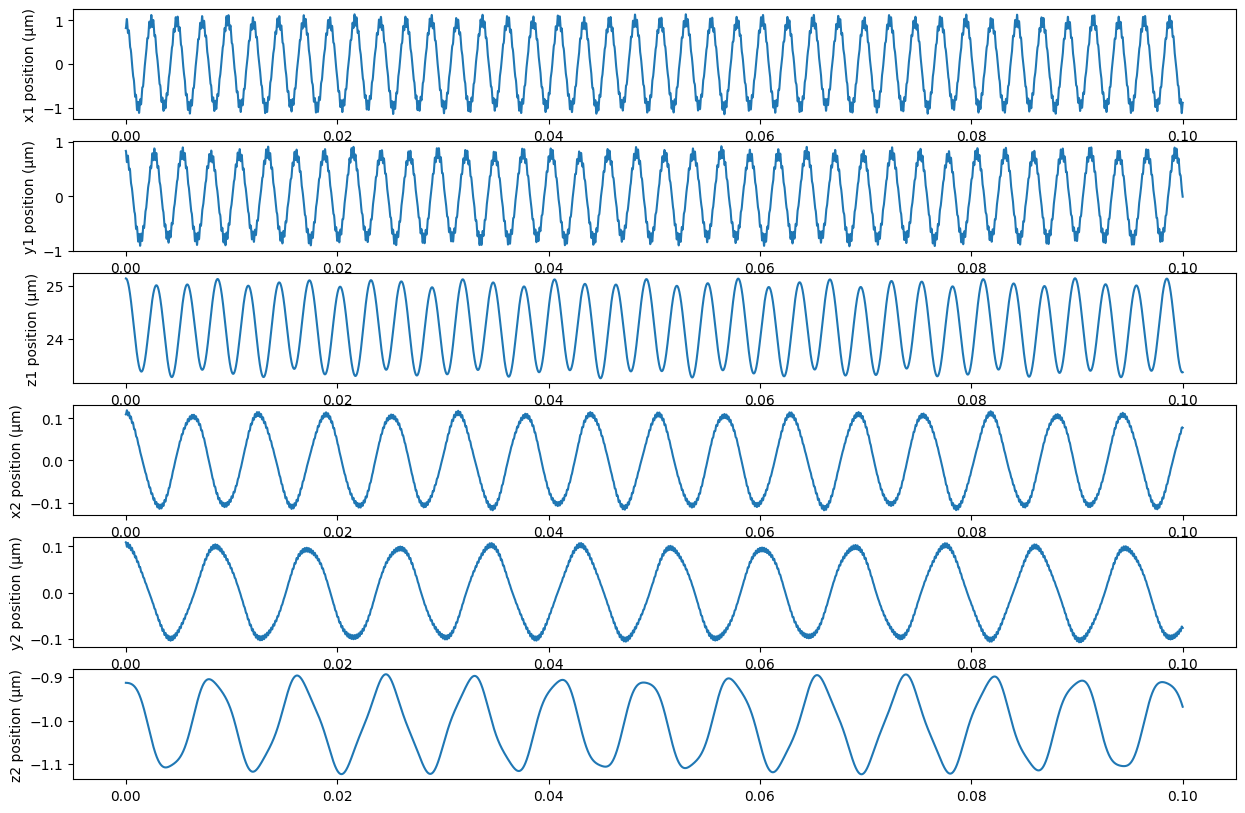

In [133]:
fig,ax = plt.subplots(6,1,figsize = (15,10))
z1s = []
y1s = []
x1s = []


x2s = []
y2s = []
z2s = []
for position in pos1s:
    z1s.append(position[2])
    y1s.append(position[1])
    x1s.append(position[0])

for position in pos2s:
    z2s.append(position[2])
    y2s.append(position[1])
    x2s.append(position[0])
x1s = np.array(x1s)
x2s = np.array(x2s)
y1s = np.array(y1s)
y2s = np.array(y2s)
z1s = np.array(z1s)
z2s = np.array(z2s)


ax[0].plot(np.array(ts)*1e3,x1s*1e6)
ax[1].plot(np.array(ts)*1e3,y1s*1e6)
ax[2].plot(np.array(ts)*1e3,z1s*1e6)



ax[3].plot(np.array(ts)*1e3,x2s*1e6)
ax[4].plot(np.array(ts)*1e3,y2s*1e6)
ax[5].plot(np.array(ts)*1e3,z2s*1e6)

ax[0].set_ylabel('x1 position (µm)')
ax[1].set_ylabel('y1 position (µm)')
ax[2].set_ylabel('z1 position (µm)')
ax[3].set_ylabel('x2 position (µm)')
ax[4].set_ylabel('y2 position (µm)')
ax[5].set_ylabel('z2 position (µm)')



ax[2].set_xlabel('Time (ms)')

Now that we have some arbitrary movement. Let's see if we can break it into the two eigenmodes of the motion! We start by looking at mass-weighted equilibrium displacement instead of full position.

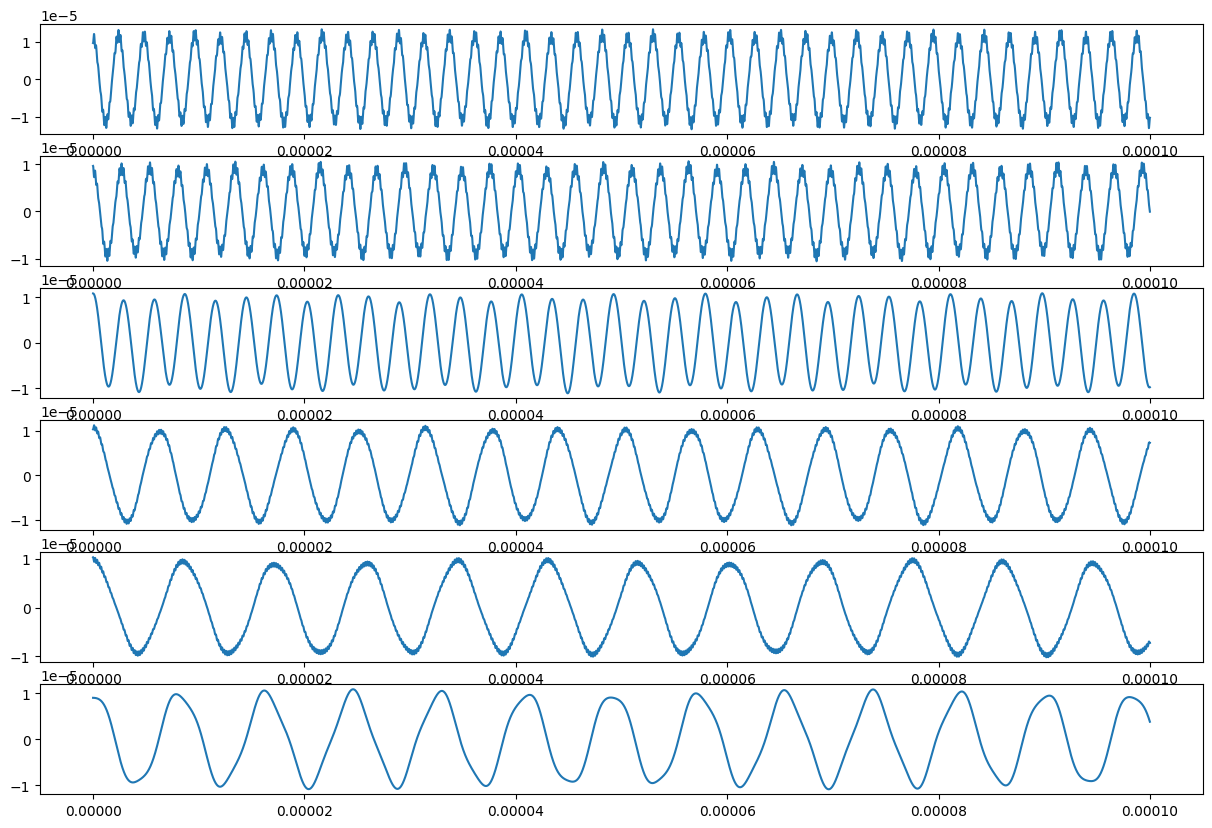

In [134]:
weighted_displacements1 = []
weighted_displacements2 = []

weighted_displacements_x1 = []
weighted_displacements_y1 = []
weighted_displacements_z1 = []

weighted_displacements_x2 = []
weighted_displacements_y2 = []
weighted_displacements_z2 = []

for position1 ,position2 in zip(pos1s,pos2s):
    weighted_displace_z1 = (position1[2]-zeq1)*np.sqrt(m1/amu)
    weighted_displace_y1 = position1[1]*np.sqrt(m1/amu)
    weighted_displace_x1 = position1[0]*np.sqrt(m1/amu)

    weighted_displacements_x1.append(weighted_displace_x1)
    weighted_displacements_y1.append(weighted_displace_y1)
    weighted_displacements_z1.append(weighted_displace_z1)
    weighted_displacements1.append(np.array([weighted_displace_x1,weighted_displace_y1,weighted_displace_z1]))
    
    weighted_displace_x2 = (position2[0])*np.sqrt(m2/amu)
    weighted_displace_y2 = position2[1]*np.sqrt(m2/amu)
    weighted_displace_z2 = (position2[2]-zeq2)*np.sqrt(m2/amu)

    weighted_displacements_x2.append(weighted_displace_x2)
    weighted_displacements_y2.append(weighted_displace_y2)
    weighted_displacements_z2.append(weighted_displace_z2)
    weighted_displacements2.append(np.array([weighted_displace_x2,weighted_displace_y2,weighted_displace_z2]))

fig,ax = plt.subplots(6,1,figsize = (15,10))
ax[0].plot(ts,weighted_displacements_x1)
ax[1].plot(ts,weighted_displacements_y1)
ax[2].plot(ts,weighted_displacements_z1)
ax[3].plot(ts,weighted_displacements_x2)
ax[4].plot(ts,weighted_displacements_y2)
ax[5].plot(ts,weighted_displacements_z2)

With the mass-weighted coordinates in place. We are ready to look at projections!

Text(0, 0.5, 'x - in phase\nprojection')

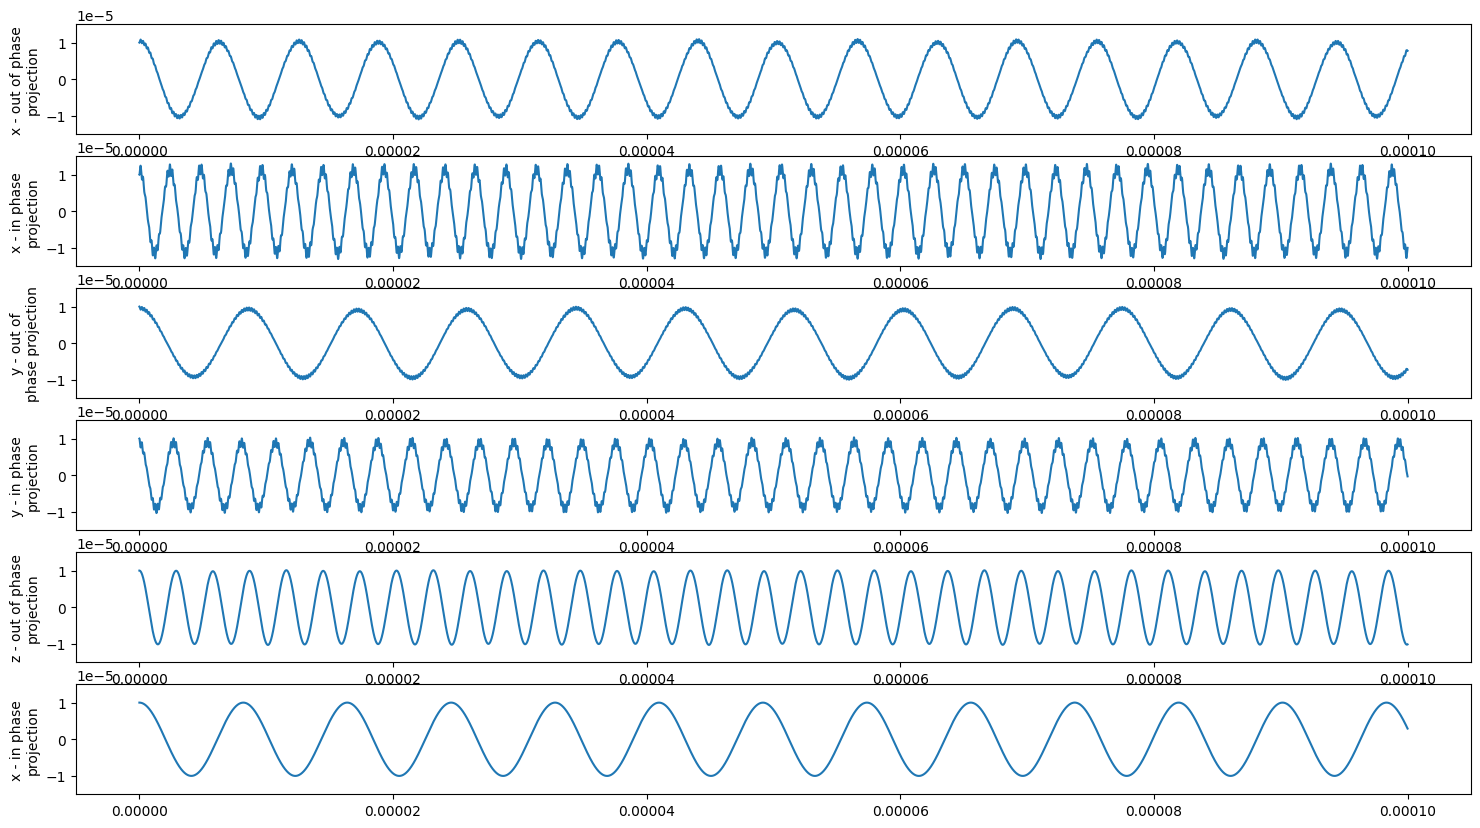

In [135]:
dot_z_out = [np.dot(np.array([z1,z2]),z_out_mode) for z1,z2 in zip(weighted_displacements_z1,weighted_displacements_z2)]
dot_z_in = [np.dot(np.array([z1,z2]),z_in_mode) for z1,z2 in zip(weighted_displacements_z1,weighted_displacements_z2)]

dot_x_in = [np.dot(np.array([x1,x2]),x_in_mode) for x1,x2 in zip(weighted_displacements_x1,weighted_displacements_x2)]
dot_x_out = [np.dot(np.array([x1,x2]),x_out_mode) for x1,x2 in zip(weighted_displacements_x1,weighted_displacements_x2)]

dot_y_in = [np.dot(np.array([y1,y2]),y_in_mode) for y1,y2 in zip(weighted_displacements_y1,weighted_displacements_y2)]
dot_y_out = [np.dot(np.array([y1,y2]),y_out_mode) for y1,y2 in zip(weighted_displacements_y1,weighted_displacements_y2)]


fig,ax = plt.subplots(6,1,figsize = (18,10))
ax[0].plot(ts,dot_x_out)
ax[1].plot(ts,dot_x_in)
ax[2].plot(ts,dot_y_out)
ax[3].plot(ts,dot_y_in)
ax[4].plot(ts,dot_z_out)
ax[5].plot(ts,dot_z_in)

for j in range(6):
    ax[j].set_ylim(1.5*(-1e-5),1.5*1e-5)


ax[0].set_ylabel('x - out of phase\nprojection')
ax[1].set_ylabel('x - in phase\nprojection')
ax[2].set_ylabel('y - out of\nphase projection')
ax[3].set_ylabel('y - in phase\nprojection')
ax[4].set_ylabel('z - out of phase\nprojection')
ax[5].set_ylabel('x - in phase\nprojection')

Very nice! We are clearly able to disassemble the motion into these eigenstates. What's even nicer is that we are clearly able to see micromotion even in the projections when these go away from their equilibria!

In [136]:

def random_direction():
    u,v = np.random.rand(2)
    phi = 2*np.pi*u                                                                                         #phi angle (physics convention) in spherical coordinates i.e. phi is i nrange [0,2pi]
    theta = np.arccos(1-2*v)                                                                                #theta nagle (physics convention) in spherical coordinates. i.e. theta is in range [0,pi]
    return np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])

k_norm = LA.norm(k)

current_pos1 = r1_init
current_vel1 = v1_init

current_pos2 = r2_init
current_vel2 = v2_init



t = 0
counter = 0
pos1s = []
pos2s = []
vel1s = []
vel2s = []
ts = []
current_state = 0

t_end = 1.5*1e-2

# while t < t_end:
#     next_t = t+dt                                                                                          #Denote next time for later uses.
#     Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)                                                  #Calculate coulomb force at time t
#     current_force1 = TrapForce(Q1,current_pos1,V_DC,V_RF,alpha,t) + Fcoul                                  #Calculate total force on ion 1
#     current_force2 = TrapForce(Q2,current_pos2,V_DC,V_RF,alpha,t) - Fcoul                                  #Calculate total force on ion 2


#     next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2                         #Calculate next position of ion 1, as per velocity verlet
#     next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2                         #Calculate next position of ion 2, as per velocity verlet

#     next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)                                                   #Calculate Coulomb force, at next time step

#     next_force1 = TrapForce(Q1,next_pos1,V_DC,V_RF,alpha,next_t) + next_fcoul                              #Calculate forces on ion 1 and 2 at next timestep. Used for updating velocty
#     next_force2 = TrapForce(Q2,next_pos2,V_DC,V_RF,alpha,next_t) - next_fcoul

#     next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt                                 # Update new velocities
#     next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt


#     if current_state == 0:                                                                                 #This is the laser cooling logic tree. 0 = Ground state, 1 = Excited State.
#         B12 = saturation*Gamma*0.5/(1+4*(detuning-np.dot(k,current_vel1))**2/(Gamma**2))                   #Calculate absorption rate
#         rnd_nr = np.random.rand()
#         if rnd_nr<B12*dt: #Absorb                                                                          #If TRUE: absorption happnes, velocity is updated and state changes
#             next_vel1 +=hbar*k/m1
#             current_state =1
#     elif current_state ==1:                                                                                 
#         B12 = saturation*Gamma*0.5/(1+4*(detuning-np.dot(k,current_vel1))**2/(Gamma**2))                   #If the ion was instead in the excited state, we once again check stim emission rate
#         rnd_nr = np.random.rand()
#         if rnd_nr < Gamma*dt:# spont emiss                                                                 #if TRUE spontaneous emission occurs, ion1 gets random kick
#             next_vel1 += hbar/m1*k_norm*random_direction()
#             current_state = 0
#         elif rnd_nr < (Gamma+B12)*dt: #Stim emiss                                                          #else if TRUE stimulated emission occurs, ion1 gets a kick of -k
#             next_vel1 -=hbar*k/m1
#             current_state = 0


#     if np.mod(counter,1000) == 0:
#         pos1s.append(current_pos1)                                                                         #Append positions and velocities, at every 500 time steps.
#         pos2s.append(current_pos2)

#         vel1s.append(current_vel1)
#         vel2s.append(current_vel2)
#         #print(Fcoul,current_force1-Fcoul)
#         ts.append(t)
#         counter = 0
#     t+=dt                                                                                                 #Increment time and the counter for data storage. Update positions and velocities.
#     counter +=1
#     current_pos1 = next_pos1
#     current_vel1 = next_vel1
#     current_pos2 = next_pos2
#     current_vel2 = next_vel2


In [137]:
#Save the data from the simulation into txt files so we don't have to redo simulation al the time.


# np.savetxt('position1_10ms.txt',np.array(pos1s))
# np.savetxt('position2_10ms.txt',np.array(pos2s))
# np.savetxt('velocity1_10ms.txt',np.array(vel1s))
# np.savetxt('velocity2_10ms.txt',np.array(vel2s))
# np.savetxt('times_10ms.txt',np.array(ts))


pos1s = np.loadtxt('position1_10ms.txt')
pos2s = np.loadtxt('position2_10ms.txt')
vel1s = np.loadtxt('velocity1_10ms.txt')
vel2s = np.loadtxt('velocity2_10ms.txt')
ts = np.loadtxt('times_10ms.txt')

Let's transform the results into weighted displacements and look at the motion!

In [138]:
weightedCoolDisplacements1 = []
weightedCoolDisplacements2 = []

print(type(pos1s[0]))

for position1,position2 in zip(pos1s,pos2s):
    weightedCoolDisplacements1.append(position1-[0,0,zeq1])                                         #Just appending elements to the list. Not actually weighted yet
    weightedCoolDisplacements2.append(position2-[0,0,zeq2])                                         #Just appending elements to the list. Not actually weighted yet

weightedCoolDisplacements1 = np.array(weightedCoolDisplacements1)*np.sqrt(m1/amu)         #Actually weighting the elements now, and turning into np arraty
weightedCoolDisplacements2 = np.array(weightedCoolDisplacements2)*np.sqrt(m2/amu)         # ------ II -------


cooledZOut = []                                                                           # Initialize lists for the projections of motion.
cooledZIn = []
cooledXOut = []
cooledXIn = []
cooledYOut = []
cooledYIn = []

for weightDisp1,weightDisp2 in zip(weightedCoolDisplacements1,weightedCoolDisplacements2):# Loop over positions to calculate the dotproducts!
    cooledXOut.append(np.dot(np.array([weightDisp1[0],weightDisp2[0]]),x_out_mode))
    cooledXIn.append(np.dot(np.array([weightDisp1[0],weightDisp2[0]]),x_in_mode))
    cooledYOut.append(np.dot(np.array([weightDisp1[1],weightDisp2[1]]),y_out_mode))
    cooledYIn.append(np.dot(np.array([weightDisp1[1],weightDisp2[1]]),y_in_mode))
    cooledZOut.append(np.dot(np.array([weightDisp1[2],weightDisp2[2]]),z_out_mode))
    cooledZIn.append(np.dot(np.array([weightDisp1[2],weightDisp2[2]]),z_in_mode))
print(weightedCoolDisplacements1.shape)
print('no. of data points is: ',len(ts))

<class 'numpy.ndarray'>
(28081, 3)
no. of data points is:  28081


Text(0, 0.5, 'z - in phase\nprojection')

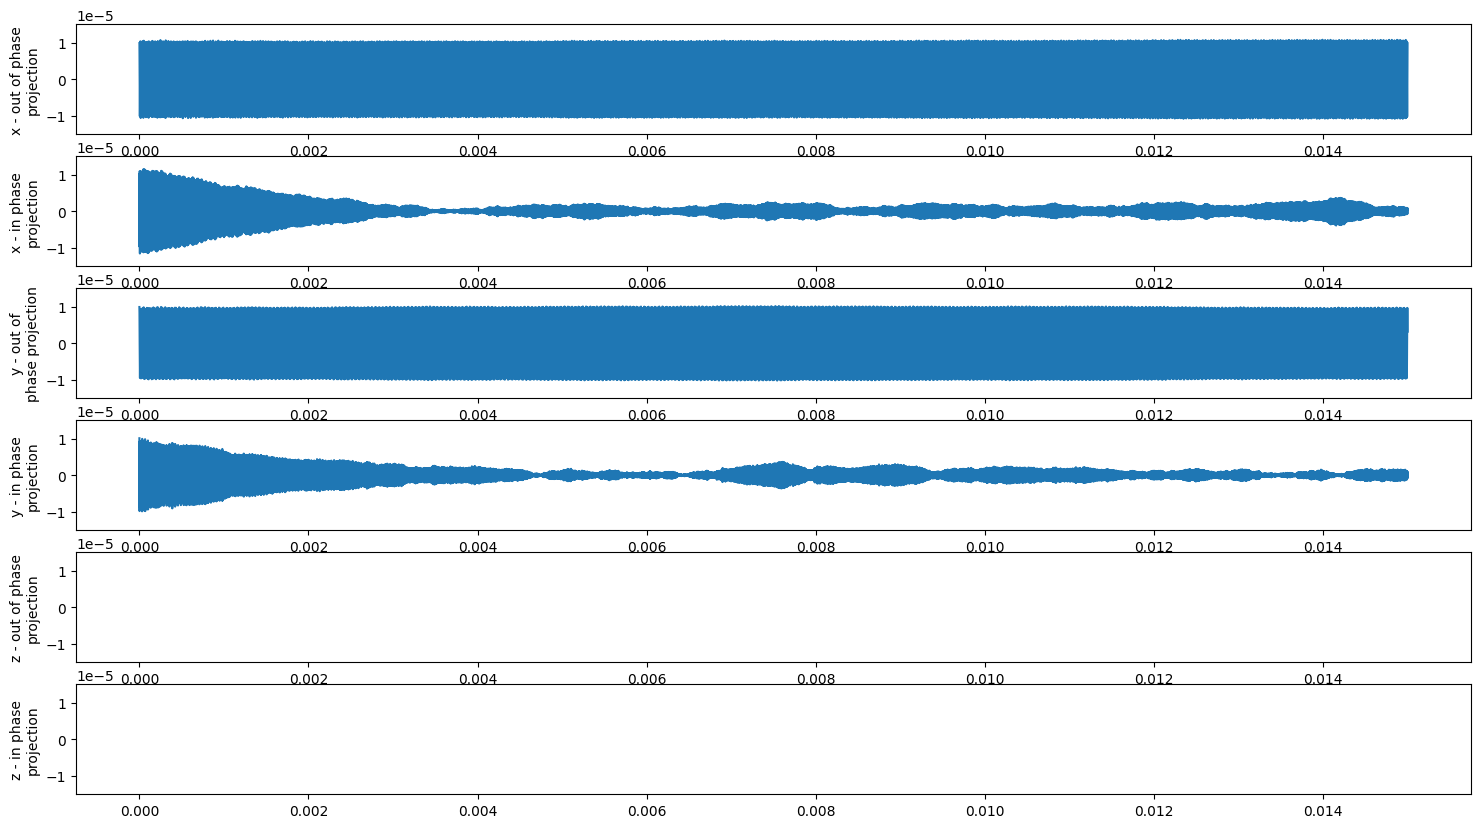

In [139]:
fig,ax = plt.subplots(6,1,figsize = (18,10))

# ax[0].plot(ts,dot_x_out)
# ax[1].plot(ts,dot_x_in)
# ax[2].plot(ts,dot_y_out)
# ax[3].plot(ts,dot_y_in)
# ax[4].plot(ts,dot_z_out)
# ax[5].plot(ts,dot_z_in)

ax[0].plot(ts,cooledXOut)
ax[1].plot(ts,cooledXIn)
ax[2].plot(ts,cooledYOut)
ax[3].plot(ts,cooledYIn)
ax[4].plot(ts,cooledZOut)
ax[5].plot(ts,cooledZIn)

for j in range(6):
    ax[j].set_ylim(1.5*(-1e-5),1.5*1e-5)

ax[0].set_ylabel('x - out of phase\nprojection')
ax[1].set_ylabel('x - in phase\nprojection')
ax[2].set_ylabel('y - out of\nphase projection')
ax[3].set_ylabel('y - in phase\nprojection')
ax[4].set_ylabel('z - out of phase\nprojection')
ax[5].set_ylabel('z - in phase\nprojection')

Let's determine the temperatures (kinetic energy) of each mode! Assume the two modes of some direction $\eta$ are denoted by $\eta_{in},\eta_{out}$ then the kinetic energy associated with a given mode will be:

$K_\nu = 1/2(\frac{d}{dt}\eta_\nu)^2,\quad \eta_\nu = \alpha_{\nu,1}\delta r_1+\alpha_{\nu,2} \delta r_2$ where the coordinates are weighted.

In [140]:
weightedCoolVelocities1 = []
weightedCoolVelocities2 = []

for vel1,vel2 in zip(vel1s,vel2s):
    weightedCoolVelocities1.append(np.sqrt(m1)*vel1)
    weightedCoolVelocities2.append(np.sqrt(m2)*vel2)

KZIn = []
KZOut = []
KXIn = []
KXOut = []
KYIn = []
KYOut = []
K1 = []
K2 = []
def modeKineticEnergy(mode_vector, weightedVelocity1,weightedVelocity2):
    return 0.5*(mode_vector[0]**2 * weightedVelocity1**2 + mode_vector[1]**2 *weightedVelocity2**2)                 #Calculate kinetic energy in the mode "mode vector", 
                                                                                                                    #given two sqrt(m) weighted velocities


for wVel1,wVel2 in zip(weightedCoolVelocities1,weightedCoolVelocities2):
    vX1 = wVel1[0] 
    vX2 = wVel2[0]
    vY1 = wVel1[1]
    vY2 = wVel2[1]
    vZ1 = wVel1[2]
    vZ2 = wVel2[2]
    K1.append(0.5*wVel1**2)
    K2.append(0.5*wVel2**2)
    KZIn.append(modeKineticEnergy(z_in_mode,vZ1,vZ2))
    KZOut.append(modeKineticEnergy(z_out_mode,vZ1,vZ2))
    KYIn.append(modeKineticEnergy(y_in_mode,vY1,vY2))
    KYOut.append(modeKineticEnergy(y_out_mode,vY1,vY2))
    KXIn.append(modeKineticEnergy(x_in_mode,vX1,vX2))
    KXOut.append(modeKineticEnergy(x_out_mode,vX1,vX2))
KZIn = np.array(KZIn)
KZOut = np.array(KZOut)
KXIn = np.array(KXIn)
KXOut = np.array(KXOut)
KYIn = np.array(KYIn)
KYOut = np.array(KYOut)

Let's do some plots of the energy contributions now! Of course, as always we multiply by 2/kB to get the result in mK (each degree of freedom gets  1/2 kb*T)

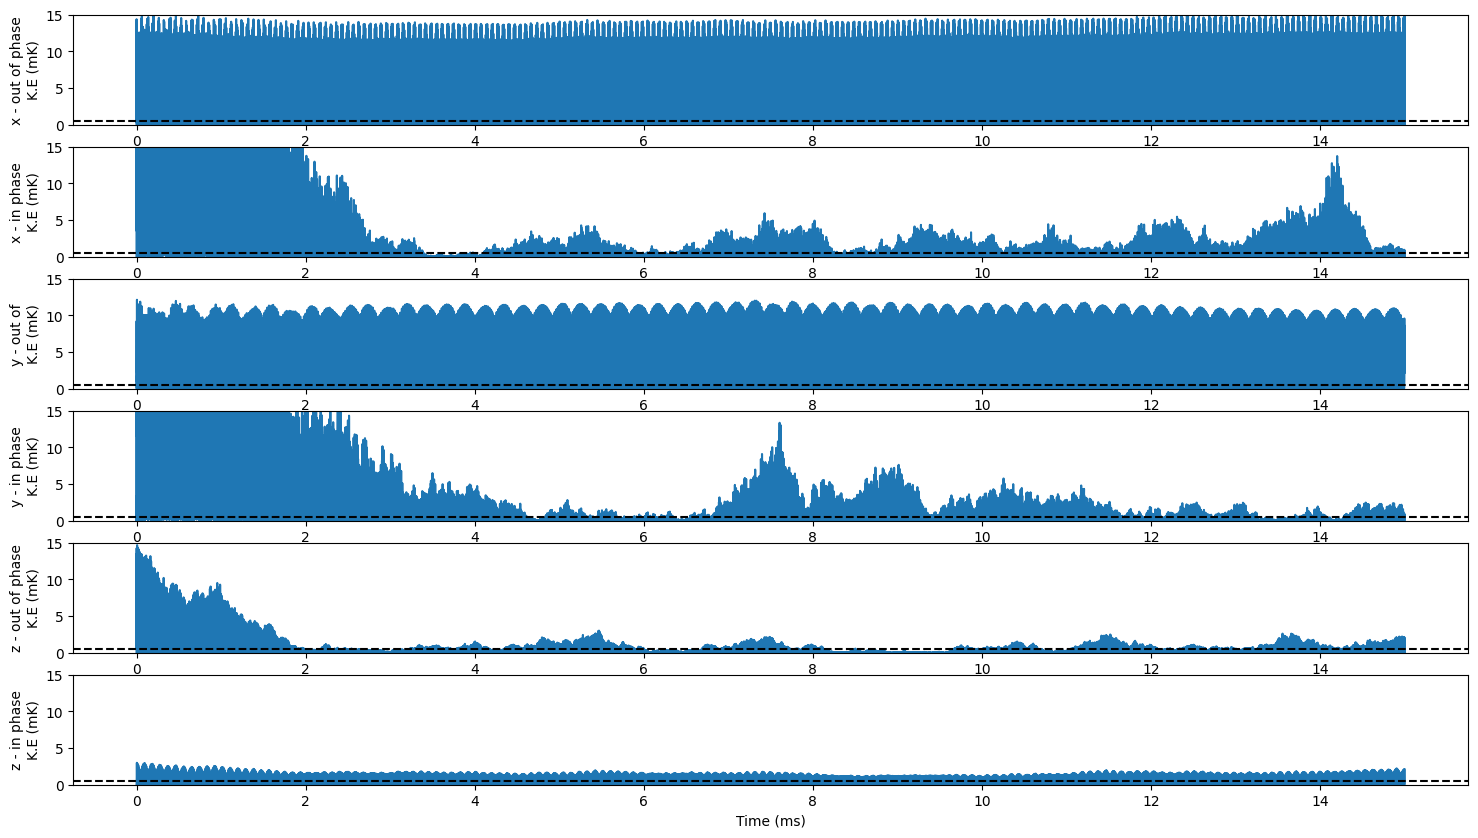

In [141]:
fig,ax = plt.subplots(6,1,figsize = (18,10))
ts = np.array(ts)

ax[0].plot(ts*1e3,2*KXOut/kb*1e3)
ax[1].plot(ts*1e3,2*KXIn/kb*1e3)
ax[2].plot(ts*1e3,2*KYOut/kb*1e3)
ax[3].plot(ts*1e3,2*KYIn/kb*1e3)
ax[4].plot(ts*1e3,2*KZOut/kb*1e3)
ax[5].plot(ts*1e3,2*KZIn/kb*1e3)


ax[0].set_ylabel('x - out of phase\nK.E (mK)')
ax[1].set_ylabel('x - in phase\nK.E (mK)')
ax[2].set_ylabel('y - out of\nK.E (mK)')
ax[3].set_ylabel('y - in phase\nK.E (mK)')
ax[4].set_ylabel('z - out of phase\nK.E (mK)')
ax[5].set_ylabel('z - in phase\nK.E (mK)')
ax[5].set_xlabel('Time (ms)')

for axe in ax:
    axe.set_ylim(0,15)
    axe.axhline(0.5,color = 'k', ls = '--')

Let's do a sum check just to make sure our calculations are right. Since we have the velocities of the ions we can also calculate their individual K.E's The sum of the modes K.E. should be equal to the sum of the two ions'

(28081, 3)


Text(0.5, 0, 'Time (ms)')

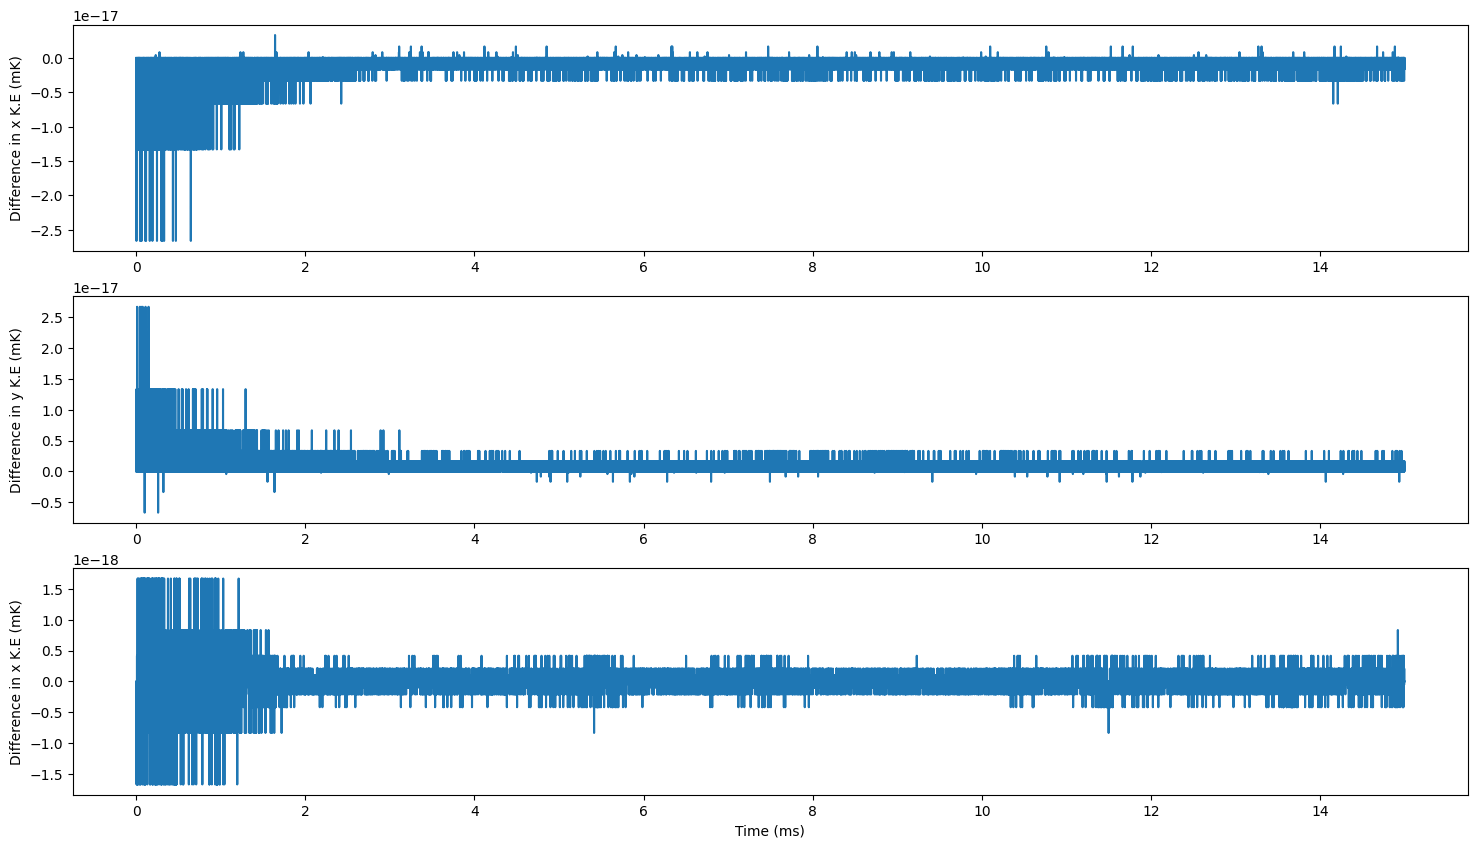

In [142]:
fig,ax = plt.subplots(3,1,figsize = (18,10))
print(np.array(K1).shape)
ax[0].plot(ts*1e3,((np.array(K1)[:,0]+np.array(K2)[:,0])-(KXOut+KXIn))/(kb/2))
ax[1].plot(ts*1e3,2/kb * ((np.array(K1)[:,1]+np.array(K2)[:,1])-(KYOut+KYIn)))
ax[2].plot(ts*1e3,2/kb * ((np.array(K1)[:,2]+np.array(K2)[:,2])-(KZOut+KZIn)))

ax[0].set_ylabel('Difference in x K.E (mK)')
ax[1].set_ylabel('Difference in y K.E (mK)')
ax[2].set_ylabel('Difference in x K.E (mK)')
ax[2].set_xlabel('Time (ms)')

Let's get a better measure of the temperature by averaging over 50 consecutive points

In [143]:
tdiff = np.diff(ts)[0]
intervalNumber = 50
intervalWidth = intervalNumber*tdiff
print('Averaging over ', intervalWidth*1e3, 'ms')
qrt = 0


def meanCalculator(numberOfPoints,array):
    result = []
    for j in range(int(np.floor(len(array)/numberOfPoints))):
        result.append(1/numberOfPoints*np.sum(array[j*numberOfPoints:(j+1)*numberOfPoints]))
    return np.array(result)



KZInMean = meanCalculator(intervalNumber,KZIn)
KZOutMean = meanCalculator(intervalNumber,KZOut)
KXInMean = meanCalculator(intervalNumber,KXIn)
KXOutMean = meanCalculator(intervalNumber,KXOut)
KYInMean = meanCalculator(intervalNumber,KYIn)
KYOutMean = meanCalculator(intervalNumber,KYOut)
tMean = meanCalculator(intervalNumber,ts)


Averaging over  0.026709401709401243 ms


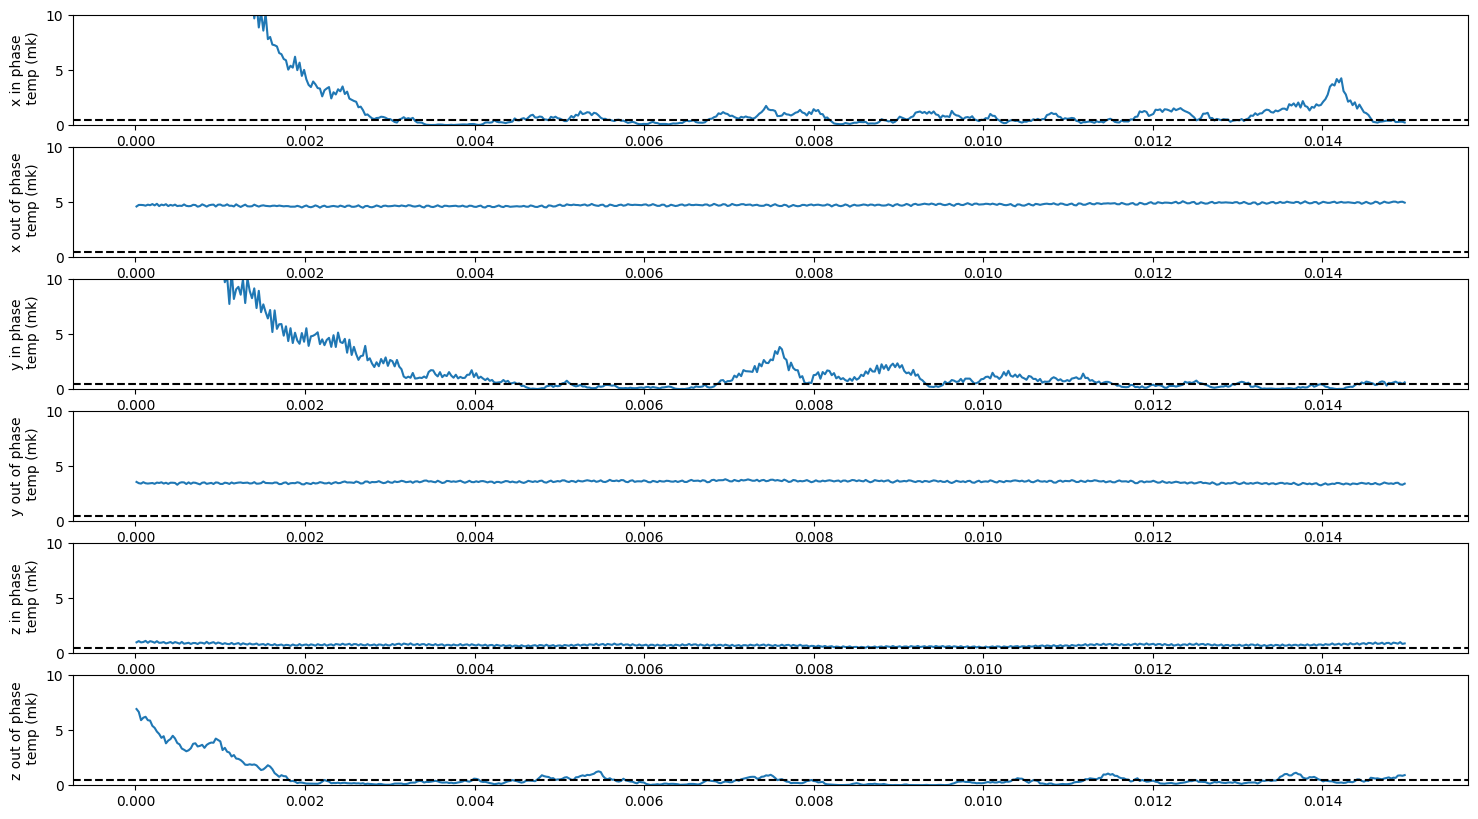

In [144]:
fig,ax = plt.subplots(6,1,figsize = (18,10))
energies = [KXInMean,KXOutMean,KYInMean,KYOutMean,KZInMean,KZOutMean]
ylabels = ['x in phase\n temp (mk)','x out of phase\n temp (mk)','y in phase\n temp (mk)','y out of phase\n temp (mk)', 'z in phase\n temp (mk)','z out of phase\n temp (mk)']

for axe,kMean,ylabel in zip(ax,energies,ylabels):
    axe.plot(tMean,1e3*np.array(kMean)/kb*2)
    axe.set_ylabel(ylabel)
    axe.set_ylim(0,10)
    axe.axhline(0.5,color = 'k', ls = '--')


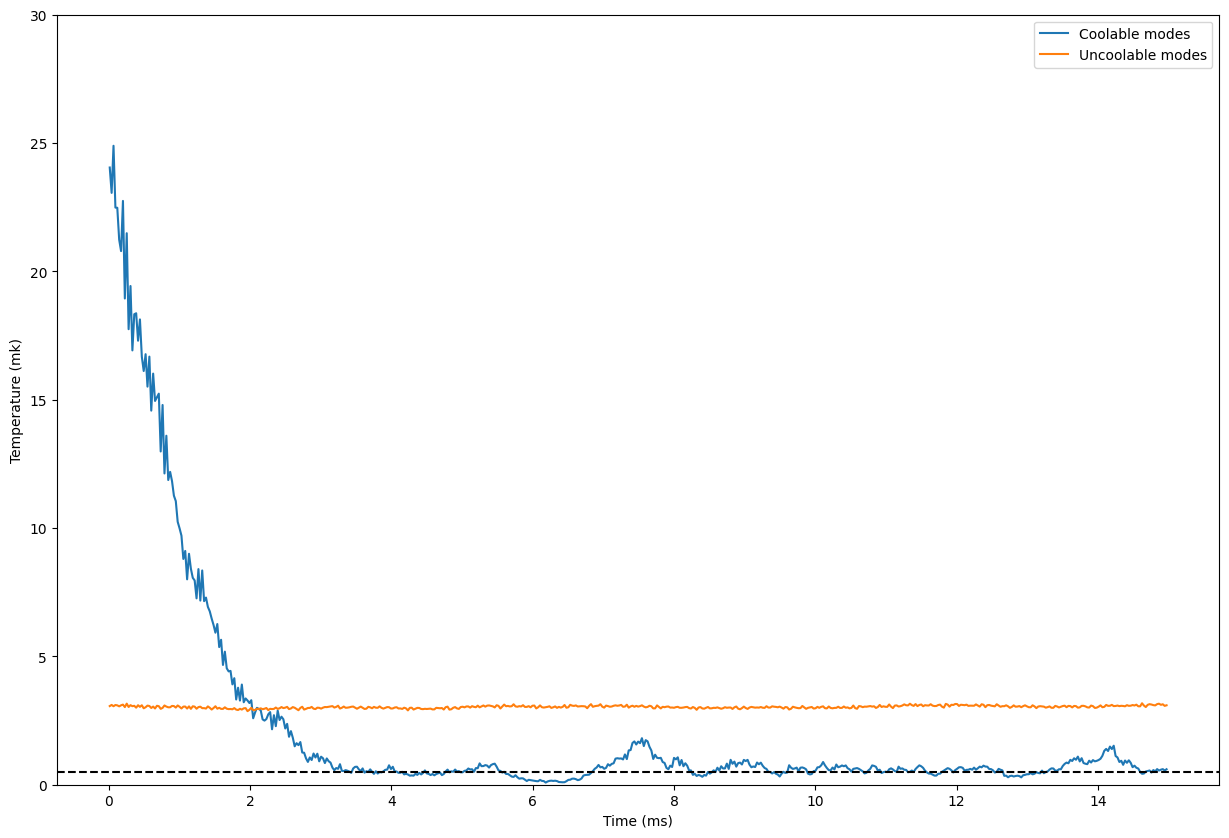

In [145]:
fig,ax = plt.subplots(figsize = (15,10))

ax.plot(np.array(tMean)*1e3,1e3*2/3/kb*(np.array(KZOutMean)+np.array(KYInMean)+np.array(KXInMean)),label = 'Coolable modes')
ax.axhline(0.5,color = 'k', ls ='--')
ax.plot(np.array(tMean)*1e3,1e3*2/3/kb*(np.array(KZInMean)+np.array(KXOutMean)+np.array(KYOutMean)),label = 'Uncoolable modes')
ax.set_ylabel('Temperature (mk)')
ax.set_xlabel('Time (ms)')
ax.legend()
ax.set_ylim(0,30)
plt.savefig('WCM_SCM_Temp.png')



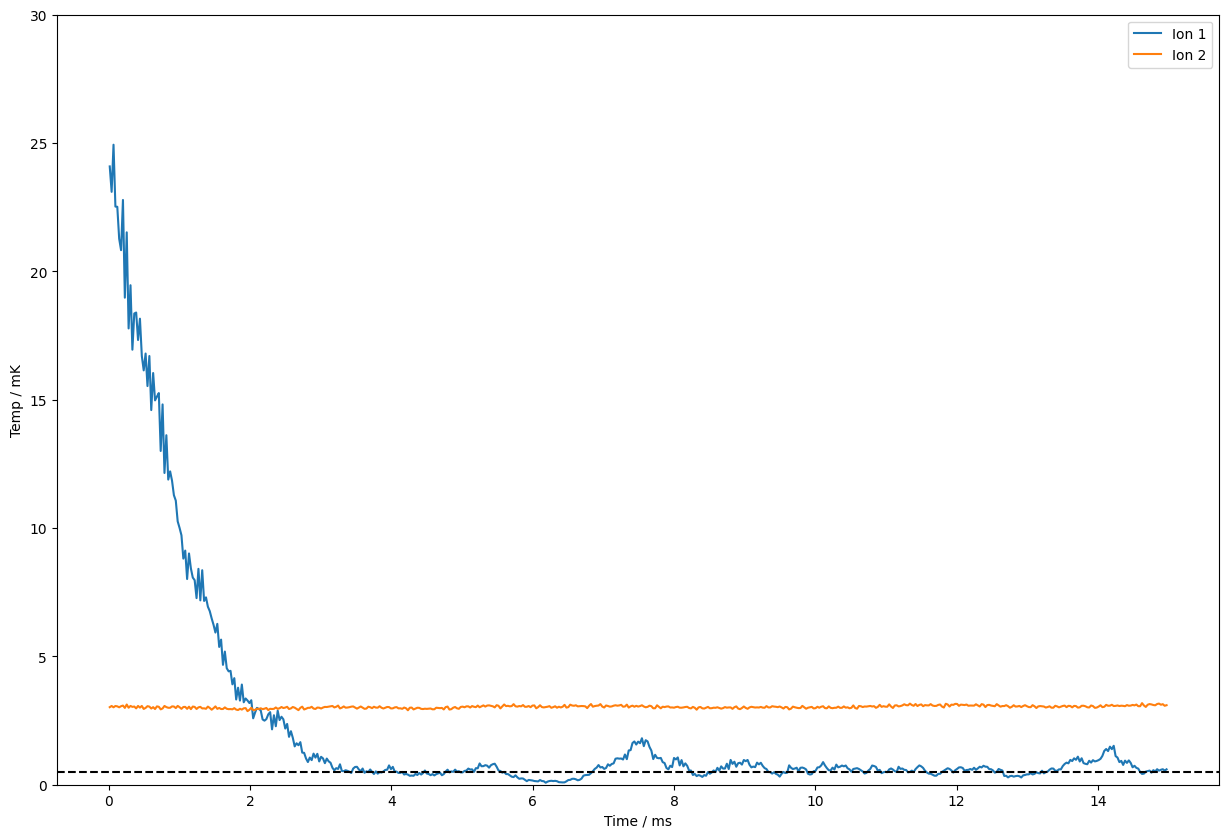

In [146]:
fig,ax = plt.subplots(figsize = (15,10))

vX1s = np.array(vel1s)[:,0]
vY1s = np.array(vel1s)[:,1]
vZ1s = np.array(vel1s)[:,2]

vX2s = np.array(vel2s)[:,0]
vY2s = np.array(vel2s)[:,1]
vZ2s = np.array(vel2s)[:,2]


KX1Mean = meanCalculator(intervalNumber,0.5*m1*vX1s**2)
KX2Mean = meanCalculator(intervalNumber,0.5*m2*vX2s**2)

KY1Mean = meanCalculator(intervalNumber,0.5*m1*vY1s**2)
KY2Mean = meanCalculator(intervalNumber,0.5*m2*vY2s**2)

KZ1Mean = meanCalculator(intervalNumber,0.5*m1*vZ1s**2)
KZ2Mean = meanCalculator(intervalNumber,0.5*m2*vZ2s**2)

ax.plot(tMean*1e3,1e3*2/3/kb*(KX1Mean+KY1Mean+KZ1Mean),label = 'Ion 1')
ax.plot(tMean*1e3,1e3*2/3/kb*(KX2Mean+KY2Mean+KZ2Mean),label = 'Ion 2')

ax.axhline(0.5,ls = '--',color = 'k')
ax.legend()
ax.set_ylim(0,30)
ax.set_xlabel('Time / ms')
ax.set_ylabel('Temp / mK')
plt.savefig('Ion1Ion2Temp.png')

Clearly cooling works, but there isn't really much in the way of sympathetic cooling, since the motional modes are effectively uncoupled. But what if we deliberately try to couple the modes?
This is done by adding a tickle (in the z direction for now), which varies with the difference of the two mode frequencies.

In [147]:
VPrime = 0.1*V_DC#1/5*V_DC





current_pos1 = r1_init
current_vel1 = v1_init

current_pos2 = r2_init
current_vel2 = v2_init







t = 0
counter = 0
pos1s = []
pos2s = []
vel1s = []
vel2s = []
ts = []
current_state = 0

t_end = 1*1e-4

while t < t_end:
    next_t = t+dt                                                                                                                                   #Denote next time for later uses.
    Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)                                                                                           #Calculate coulomb force at time t
    current_force1 = TrapForce(Q1,current_pos1,V_DC+VTickle(VPrime,t,z_freqs[0],z_freqs[1]),V_RF,alpha,t) + Fcoul                                  #Calculate total force on ion 1
    current_force2 = TrapForce(Q2,current_pos2,V_DC+VTickle(VPrime,t,z_freqs[0],z_freqs[1]),V_RF,alpha,t) - Fcoul                                  #Calculate total force on ion 2


    next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2                         #Calculate next position of ion 1, as per velocity verlet
    next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2                         #Calculate next position of ion 2, as per velocity verlet

    next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)                                                   #Calculate Coulomb force, at next time step

    next_force1 = TrapForce(Q1,next_pos1,V_DC+VTickle(VPrime,next_t,z_freqs[0],z_freqs[1]),V_RF,alpha,next_t) + next_fcoul                              #Calculate forces on ion 1 and 2 at next timestep. Used for updating velocty
    next_force2 = TrapForce(Q2,next_pos2,V_DC+VTickle(VPrime,next_t,z_freqs[0],z_freqs[1]),V_RF,alpha,next_t) - next_fcoul

    next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt                                 # Update new velocities
    next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt

    if np.mod(counter,100) == 0:
        pos1s.append(current_pos1)                                                                         #Append positions and velocities, at every 500 time steps.
        pos2s.append(current_pos2)

        vel1s.append(current_vel1)
        vel2s.append(current_vel2)
        #print(Fcoul,current_force1-Fcoul)
        ts.append(t)
        counter = 0
    t+=dt                                                                                                  #Increment time and the counter for data storage. Update positions and velocities.
    counter +=1
    current_pos1 = next_pos1
    current_vel1 = next_vel1
    current_pos2 = next_pos2
    current_vel2 = next_vel2





1560


Text(0.5, 0, 'Time ms')

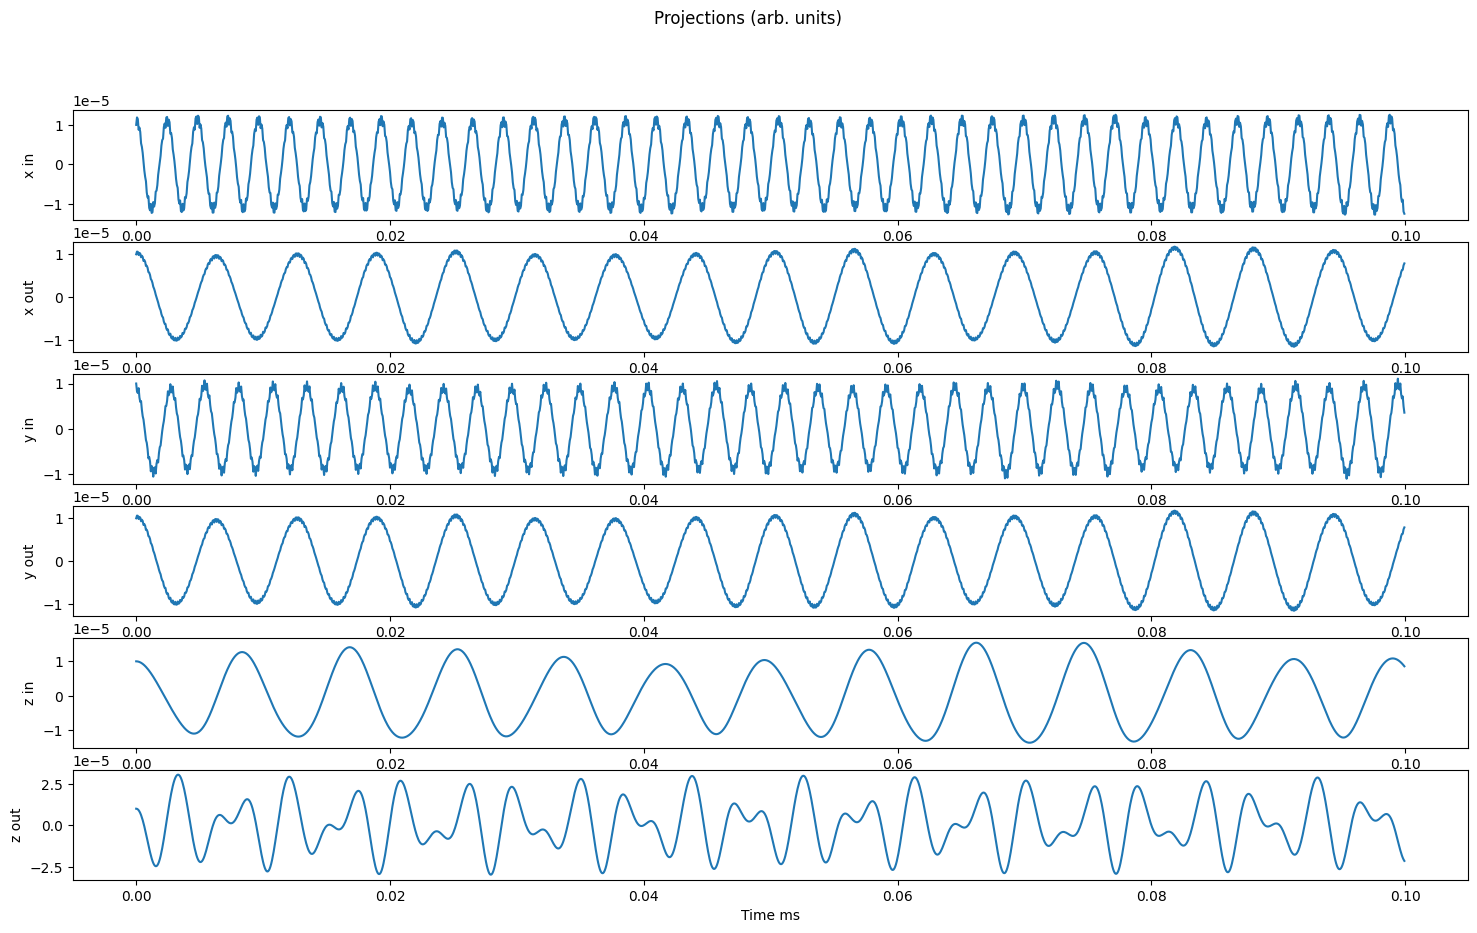

In [148]:
np.savetxt('Clean2ion_r1.txt',pos1s)
np.savetxt('Clean2ion_r2.txt',pos2s)
np.savetxt('Clean2ion_v1.txt',vel1s)
np.savetxt('Clean2ion_v2.txt',vel2s)
np.savetxt('Clean2ion_t.txt',ts)





fig,ax = plt.subplots(6,1,figsize =(18,10))
vel1s = np.array(vel1s)
vel2s = np.array(vel2s)
pos1s = np.array(pos1s)
pos2s = np.array(pos2s)


projZin = []
projZout = []
projXin = []
projXout = []
projYin = []
projYout = []


def displacementWProjection(r1,r2,req1,req2,m1,m2,vec):
    amu = 1.66*(10**(-27))
    return np.sqrt(m1/amu)*vec[0]*(r1-req1)+np.sqrt(m2/amu)*vec[1]*(r2-req2)


for x1,x2,y1,y2,z1,z2 in zip(pos1s[:,0],pos2s[:,0],pos1s[:,1],pos2s[:,1],pos1s[:,2],pos2s[:,2]):
    projZin.append(displacementWProjection(z1,z2,zeq1,zeq2,m1,m2,z_in_mode))
    projZout.append(displacementWProjection(z1,z2,zeq1,zeq2,m1,m2,z_out_mode))
    projXin.append(displacementWProjection(x1,x2,0,0,m1,m2,x_in_mode))
    projXout.append(displacementWProjection(x1,x2,0,0,m1,m2,x_out_mode))
    projYin.append(displacementWProjection(y1,y2,0,0,m1,m2,y_in_mode))
    projYout.append(displacementWProjection(y1,y2,0,0,m1,m2,y_out_mode))



yLabels = ['x in', 'x out','y in','y out','z in','z out']
cleanProjections = [projXin,projXout,projYin,projXout,projZin,projZout]
for ys,axe,label in zip(cleanProjections,ax,yLabels):
    axe.plot(np.array(ts)*1e3,ys)
    axe.set_ylabel(label)
print(len(ts))
fig.suptitle('Projections (arb. units)')
fig.tight_layout
ax[-1].set_xlabel('Time ms')

Let's try to get a good idea of the axial frequencices numerically so we can try to couple the modes. Let's also compare with theory!

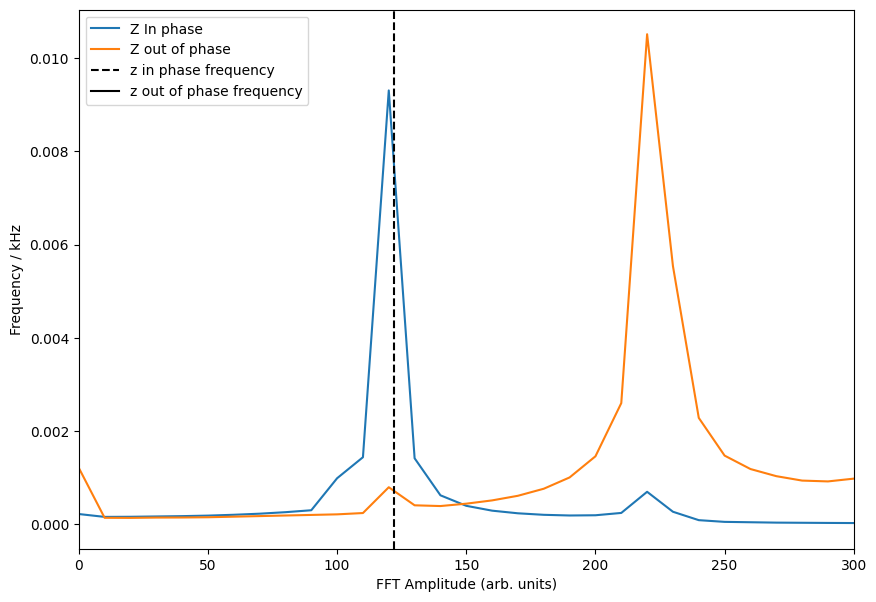

In [149]:
ZInfft = fft(projZin)
ZOutfft = fft(projZout)
tfft = fftfreq(len(ts),np.diff(ts)[0])
fftfig,fftax = plt.subplots(figsize = (10,7))

fftax.plot(tfft[:len(ts)//2]*1e-3,np.abs(ZInfft)[0:len(ts)//2],label = 'Z In phase')
fftax.plot(tfft[:len(ts)//2]*1e-3,np.abs(ZOutfft)[0:len(ts)//2],label = 'Z out of phase')
fftax.set_xlim(0,300)
fftax.set_xlabel('FFT Amplitude (arb. units)')
fftax.set_ylabel('Frequency / kHz')
fftax.axvline(freqZin*1e-3/(2*np.pi),color = 'k',ls = '--',label = 'z in phase frequency')
fftax.axvline(freqZout*1e-3/(2*np.pi),color = 'k',label = 'z out of phase frequency')

fftax.legend()
plt.savefig('2IonFrequenciesZ.png')

Let us initialize the ions in the uncoolable state $z_{in}$, and then attempt to transfer the population.

In [150]:
x1_init = 0
x2_init = 0


y1_init = 0
y2_init = 0

z1_init = zeq1+1e-4*z_in_mode[0]/np.sqrt(m1/amu)
z2_init = zeq2+1e-4*z_in_mode[1]/np.sqrt(m2/amu)

r1_init = np.array([x1_init,y1_init,z1_init])
r2_init = np.array([x2_init,y2_init,z2_init])

v1_init = np.zeros(3)
v2_init = np.zeros(3)
print('Initial displacements:')
print('z1: ',(z1_init-zeq1)*1e6,' um')
print('z2: ',(z2_init-zeq2)*1e6,' um')






current_pos1 = r1_init
current_vel1 = v1_init

current_pos2 = r2_init
current_vel2 = v2_init

t = 0
counter = 0
pos1s = []
pos2s = []
vel1s = []
vel2s = []
ts = []
current_state = 0

t_end = 1*1e-4

while t < t_end:
    next_t = t+dt                                                                                                                                   #Denote next time for later uses.
    Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)                                                                                           #Calculate coulomb force at time t
    current_force1 = TrapForce(Q1,current_pos1,V_DC+VTickle(VPrime,t,z_freqs[0],z_freqs[1]),V_RF,alpha,t) + Fcoul                                  #Calculate total force on ion 1
    current_force2 = TrapForce(Q2,current_pos2,V_DC+VTickle(VPrime,t,z_freqs[0],z_freqs[1]),V_RF,alpha,t) - Fcoul                                  #Calculate total force on ion 2


    next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2                         #Calculate next position of ion 1, as per velocity verlet
    next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2                         #Calculate next position of ion 2, as per velocity verlet

    next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)                                                   #Calculate Coulomb force, at next time step

    next_force1 = TrapForce(Q1,next_pos1,V_DC+VTickle(VPrime,next_t,z_freqs[0],z_freqs[1]),V_RF,alpha,next_t) + next_fcoul                              #Calculate forces on ion 1 and 2 at next timestep. Used for updating velocty
    next_force2 = TrapForce(Q2,next_pos2,V_DC+VTickle(VPrime,next_t,z_freqs[0],z_freqs[1]),V_RF,alpha,next_t) - next_fcoul

    next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt                                 # Update new velocities
    next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt

    if np.mod(counter,100) == 0:
        pos1s.append(current_pos1)                                                                         #Append positions and velocities, at every 500 time steps.
        pos2s.append(current_pos2)

        vel1s.append(current_vel1)
        vel2s.append(current_vel2)
        #print(Fcoul,current_force1-Fcoul)
        ts.append(t)
        counter = 0
    t+=dt                                                                                                  #Increment time and the counter for data storage. Update positions and velocities.
    counter +=1
    current_pos1 = next_pos1
    current_vel1 = next_vel1
    current_pos2 = next_pos2
    current_vel2 = next_vel2



Initial displacements:
z1:  0.7894383789097165  um
z2:  1.0496489493157592  um


Let's do a quick plot of the motion.

[array([0.00000000e+00, 0.00000000e+00, 2.49986325e-05]), array([0.00000000e+00, 0.00000000e+00, 2.49974586e-05]), array([0.00000000e+00, 0.00000000e+00, 2.49929617e-05]), array([0.00000000e+00, 0.00000000e+00, 2.49837183e-05]), array([0.00000000e+00, 0.00000000e+00, 2.49683904e-05]), array([0.00000000e+00, 0.00000000e+00, 2.49457642e-05]), array([0.00000000e+00, 0.00000000e+00, 2.49147872e-05]), array([0.00000000e+00, 0.00000000e+00, 2.48746018e-05]), array([0.00000000e+00, 0.00000000e+00, 2.48245745e-05]), array([0.00000000e+00, 0.00000000e+00, 2.47643215e-05]), array([0.00000000e+00, 0.00000000e+00, 2.46937278e-05]), array([0.00000000e+00, 0.00000000e+00, 2.46129609e-05]), array([0.00000000e+00, 0.00000000e+00, 2.45224782e-05]), array([0.00000000e+00, 0.00000000e+00, 2.44230269e-05]), array([0.0000000e+00, 0.0000000e+00, 2.4315638e-05]), array([0.00000000e+00, 0.00000000e+00, 2.42016115e-05]), array([0.00000000e+00, 0.00000000e+00, 2.40824958e-05]), array([0.00000000e+00, 0.00000000

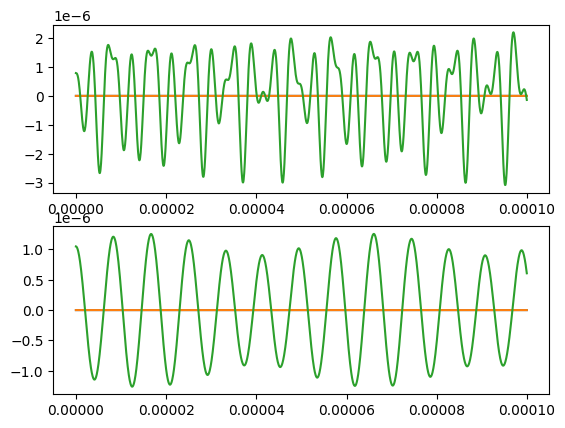

In [151]:
print(pos1s)
fig,ax = plt.subplots(2,1)
ax[0].plot(ts,pos1s-np.array([0,0,zeq1]))
ax[1].plot(ts,pos2s-np.array([0,0,zeq2]))

Motion looks fine enough, that we believe we are still in the harmonic regime, i.e. the displacements do not become too high. Have we correctly put them into **only** $z_ {in}$?

Text(0.5, 0.98, 'Projections (arb. units)')

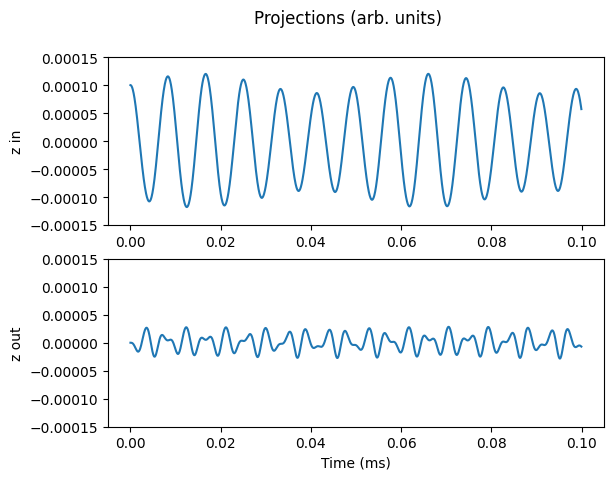

In [152]:
zinProj = []
zoutProj = []

for z1,z2 in zip(np.array(pos1s)[:,2],np.array(pos2s)[:,2]):
    zinProj.append(displacementWProjection(z1,z2,zeq1,zeq2,m1,m2,z_in_mode))
    zoutProj.append(displacementWProjection(z1,z2,zeq1,zeq2,m1,m2,z_out_mode))
fig,ax = plt.subplots(2,1)

ax[0].plot(np.array(ts)*1e3,zinProj)
ax[1].plot(np.array(ts)*1e3,zoutProj)
labels = ['z in', 'z out']
for axe,label in zip(ax,labels):
    axe.set_ylim(-1.5*1e-4,1.5*1e-4)
    axe.set_ylabel(label)
ax[-1].set_xlabel('Time (ms)')
fig.suptitle('Projections (arb. units)')

Okay, we are quite clearly in the correct initialization! Let's try to shift!

In [153]:
x1_init = 0
x2_init = 0


y1_init = 0
y2_init = 0

z1_init = zeq1+1e-3*z_in_mode[0]/np.sqrt(m1/amu)
z2_init = zeq2+1e-3*z_in_mode[1]/np.sqrt(m2/amu)

r1_init = np.array([x1_init,y1_init,z1_init])
r2_init = np.array([x2_init,y2_init,z2_init])

v1_init = np.zeros(3)
v2_init = np.zeros(3)
print('Initial displacements:')
print('z1: ',(z1_init-zeq1)*1e6,' um')
print('z2: ',(z2_init-zeq2)*1e6,' um')





VPrime = 0.05*V_DC
current_pos1 = r1_init
current_vel1 = v1_init

current_pos2 = r2_init
current_vel2 = v2_init

t = 0
counter = 0
pos1s = []
pos2s = []
vel1s = []
vel2s = []
ts = []
current_state = 0

t_end = 1*1e-3

while t < t_end:
    next_t = t+dt                                                                                                                                   #Denote next time for later uses.
    Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)                                                                                           #Calculate coulomb force at time t
    current_force1 = TrapForce(Q1,current_pos1,V_DC,V_RF,alpha,t) + Fcoul + TrapForce(Q1,current_pos1,VTickle(VPrime,t,freqZout,freqZin),0,0.5,t)                                 #Calculate total force on ion 1
    current_force2 = TrapForce(Q2,current_pos2,V_DC,V_RF,alpha,t) - Fcoul + TrapForce(Q2,current_pos2,VTickle(VPrime,t,freqZout,freqZin),0,0.5,t)                   #Calculate total force on ion 2


    next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2                         #Calculate next position of ion 1, as per velocity verlet
    next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2                         #Calculate next position of ion 2, as per velocity verlet

    next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)                                                   #Calculate Coulomb force, at next time step

    next_force1 = TrapForce(Q1,next_pos1,V_DC,V_RF,alpha,next_t) + next_fcoul + TrapForce(Q1,next_pos1,VTickle(VPrime,next_t,freqZout,freqZin),0,0.5,next_t)                              #Calculate forces on ion 1 and 2 at next timestep. Used for updating velocty
    next_force2 = TrapForce(Q2,next_pos2,V_DC,V_RF,alpha,next_t) - next_fcoul + TrapForce(Q2,next_pos2,VTickle(VPrime,next_t,freqZout,freqZin),0,0.5,next_t)

    next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt                                 # Update new velocities
    next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt

    if np.mod(counter,100) == 0:
        pos1s.append(current_pos1)                                                                         #Append positions and velocities, at every 500 time steps.
        pos2s.append(current_pos2)

        vel1s.append(current_vel1)
        vel2s.append(current_vel2)
        #print(Fcoul,current_force1-Fcoul)
        ts.append(t)
        counter = 0
    t+=dt                                                                                                  #Increment time and the counter for data storage. Update positions and velocities.
    counter +=1
    current_pos1 = next_pos1
    current_vel1 = next_vel1
    current_pos2 = next_pos2
    current_vel2 = next_vel2


Initial displacements:
z1:  7.894383789097151  um
z2:  10.496489493157592  um


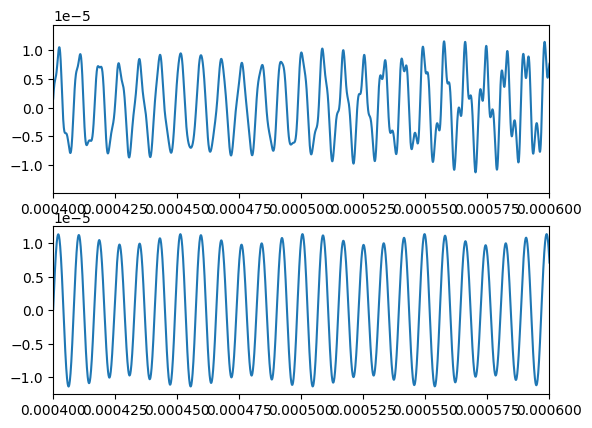

In [154]:
fig,ax = plt.subplots(2,1)
ax[0].plot(ts,np.array(pos1s)[:,2]-zeq1)
ax[1].plot(ts,np.array(pos2s)[:,2]-zeq2)
for axe in ax:
    axe.set_xlim(0.0004,0.0006)

Text(0.5, 0, 'Time (ms)')

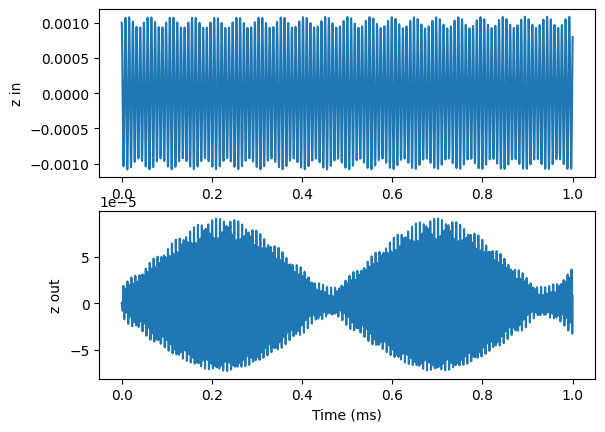

In [155]:
zinProj = []
zoutProj = []

for z1,z2 in zip(np.array(pos1s)[:,2],np.array(pos2s)[:,2]):
    zinProj.append(displacementWProjection(z1,z2,zeq1,zeq2,m1,m2,z_in_mode))
    zoutProj.append(displacementWProjection(z1,z2,zeq1,zeq2,m1,m2,z_out_mode))
fig,ax = plt.subplots(2,1)

ax[0].plot(np.array(ts)*1e3,zinProj)
ax[1].plot(np.array(ts)*1e3,zoutProj)
labels = ['z in', 'z out']
for axe,label in zip(ax,labels):
    #axe.set_ylim(-2.2*1e-3,2.2*1e-3)
    axe.set_ylabel(label)
ax[-1].set_xlabel('Time (ms)')


That might be hard to track. Remember that the out of phase mode carries a lot less energy kinetic energy than the in phase mode (since masses are very different). Let's plot their kinetic energies.

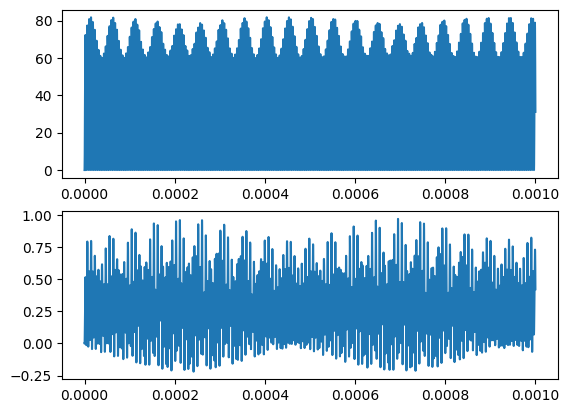

In [156]:
TIn = []
TOut = []
for vel1,vel2 in zip(np.array(vel1s)[:,2],np.array(vel2s)[:,2]):
    TIn.append(z_in_mode[0]**2*m1*vel1*2+z_in_mode[1]**2*m2*vel2**2)
    TOut.append(z_out_mode[0]**2*m1*vel1+z_out_mode[1]**2*m2*vel2**2)

fig,ax = plt.subplots(2,1)
ax[0].plot(ts,np.array(TIn)/kb)
ax[1].plot(ts,np.array(TOut)/kb)

In [157]:
def minimizerTarget(d):
    t = 0
    counter = 0
    pos1s = []
    pos2s = []
    vel1s = []
    vel2s = []
    ts = []

    t_end = 10*1e-3
    current_pos1 = r1_init
    current_vel1 = v1_init

    current_pos2 = r2_init
    current_vel2 = v2_init
    while t < t_end:
        next_t = t+dt                                                                                                                                   #Denote next time for later uses.
        Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)                                                                                           #Calculate coulomb force at time t
        current_force1 = TrapForce(Q1,current_pos1,V_DC,V_RF,alpha,t) + Fcoul + TrapForce(Q1,current_pos1,VTickle(VPrime,t,freqZin+d,freqZout),0,0.5,t)                                 #Calculate total force on ion 1
        current_force2 = TrapForce(Q2,current_pos2,V_DC,V_RF,alpha,t) - Fcoul + TrapForce(Q2,current_pos2,VTickle(VPrime,t,freqZin+d,freqZout),0,0.5,t)                   #Calculate total force on ion 2


        next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2                         #Calculate next position of ion 1, as per velocity verlet
        next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2                         #Calculate next position of ion 2, as per velocity verlet

        next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)                                                   #Calculate Coulomb force, at next time step

        next_force1 = TrapForce(Q1,next_pos1,V_DC,V_RF,alpha,next_t) + next_fcoul + TrapForce(Q1,next_pos1,VTickle(VPrime,next_t,freqZin+d,freqZout),0,0.5,next_t)                              #Calculate forces on ion 1 and 2 at next timestep. Used for updating velocty
        next_force2 = TrapForce(Q2,next_pos2,V_DC,V_RF,alpha,next_t) - next_fcoul + TrapForce(Q2,next_pos2,VTickle(VPrime,next_t,freqZin+d,freqZout),0,0.5,next_t)

        next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt                                 # Update new velocities
        next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt

        if np.mod(counter,100) == 0:
            pos1s.append(current_pos1)                                                                         #Append positions and velocities, at every 500 time steps.
            pos2s.append(current_pos2)

            vel1s.append(current_vel1)
            vel2s.append(current_vel2)
            #print(Fcoul,current_force1-Fcoul)
            ts.append(t)
            counter = 0
        t+=dt                                                                                                  #Increment time and the counter for data storage. Update positions and velocities.
        counter +=1
        current_pos1 = next_pos1
        current_vel1 = next_vel1
        current_pos2 = next_pos2
        current_vel2 = next_vel2
    zoutProj = []

    for z1,z2 in zip(np.array(pos1s)[:,2],np.array(pos2s)[:,2]):
        zoutProj.append(displacementWProjection(z1,z2,zeq1,zeq2,m1,m2,z_out_mode))
    return np.min(-np.abs(zoutProj))

#A = minimizerTarget()

In [158]:
values = []
for d in np.linspace(-10*2*np.pi*1e3,10*2*np.pi*1e3,5):
    values.append(minimizerTarget(d))


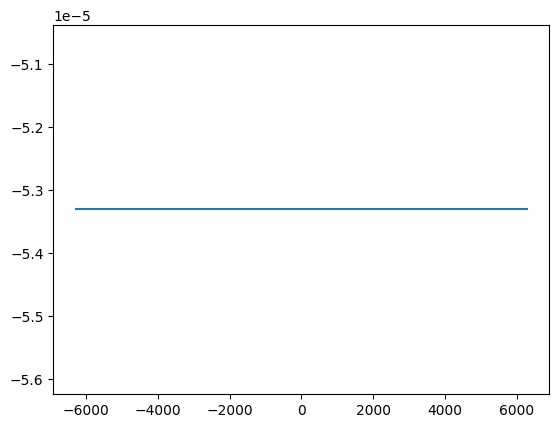

In [ ]:
fig,ax = plt.subplots()
ax.plot(np.linspace(-2*np.pi*1e3,2*np.pi*1e3,10),values)

In [ ]:
values2 = []
for d in np.linspace(-10*2*2*np.pi*1e3,10*2*2*np.pi*1e3,200):
    values2.append(minimizerTarget(d))